# MMA/MMAB 869 2024: Individual Assignment


<font color='red'>\# TODO: fill in the below</font>

- [Eric, Lai]
- [20475138]
- [MMA 2025S]
- [November 20th, 2024]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2024_869_FirstnameLastName.pdf`
      - E.g., `869_NasrinYousefi.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [493]:
import datetime
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [494]:
print(datetime.datetime.now())

2024-12-03 22:41:32.720221


In [495]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [496]:
!python --version

Python 3.11.5


In [497]:
!echo $PYTHONPATH

$PYTHONPATH


In [498]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [499]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


# Summary of Data

In [500]:
# Variables already appear to be normalized
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

list(df1)
print(df1.shape)
print(df1.info())
print(df1.describe().transpose())
print(df1.head(n=20))
print(df1.tail())

X = df1

(505, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB
None
               count     mean      std      min      25%      50%       75%  \
Age           505.00    59.02    24.14    17.00    34.00    59.00     85.00   
Income        505.00 75513.29 35992.92 12000.00 34529.00 75078.00 107100.00   
SpendingScore 505.00     0.51     0.26     0.00     0.30     0.37      0.77   
Savings       505.00 11862.46  4949.23     0.00  6828.71 14209.93  16047.27   

                    max  
Age               97.00  
Income        142000.00  
SpendingScore      1.00  
Savings        20000.00  
    Age  Income  SpendingScore  Savings
0

# 1) Standard Scaler

In [501]:
scaler = StandardScaler()
features = ['Age', 'Income','SpendingScore','Savings']
df1[features] = scaler.fit_transform(df1[features])


## 1.1: Clustering Algorithm #1

# K-Means

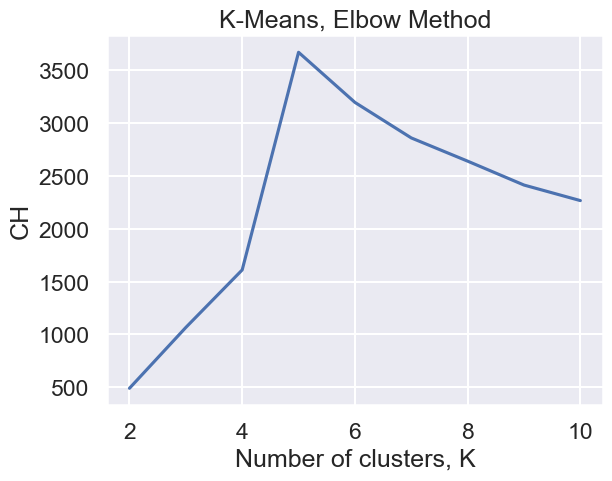

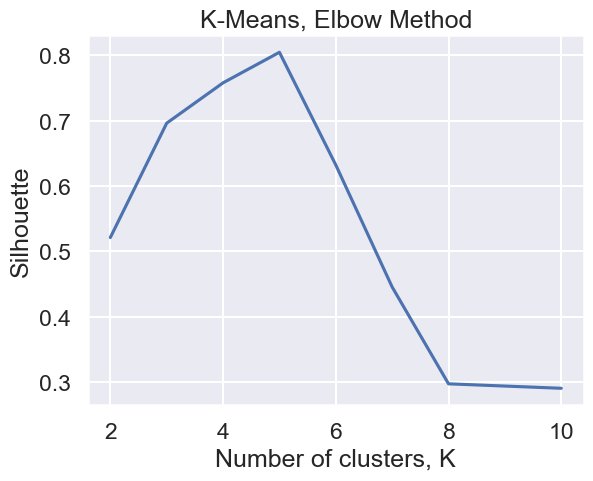

In [502]:
import warnings
warnings.filterwarnings("ignore")

ch = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    ch[k] = calinski_harabasz_score(df1, kmeans.labels_)
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("CH");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


# It appears the model has the highest CH and Silhouette with 5 clusters. We fit the model with 5 clusters

In [503]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df1)

silhouette_score1 = silhouettes[5]
ch_score1 = ch[5]

print("Silhouette Score:", silhouette_score1)
print("Calinski Harabasz Score:", ch_score1)

Silhouette Score: 0.8048976287755765
Calinski Harabasz Score: 3671.358018517615


# Repeat Process with MinMax Scalar and Robust Scalar to see if it improves model performance

# 2) Robust Scaler

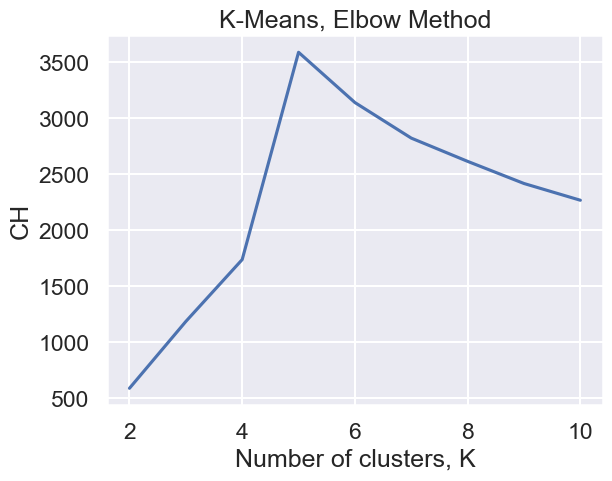

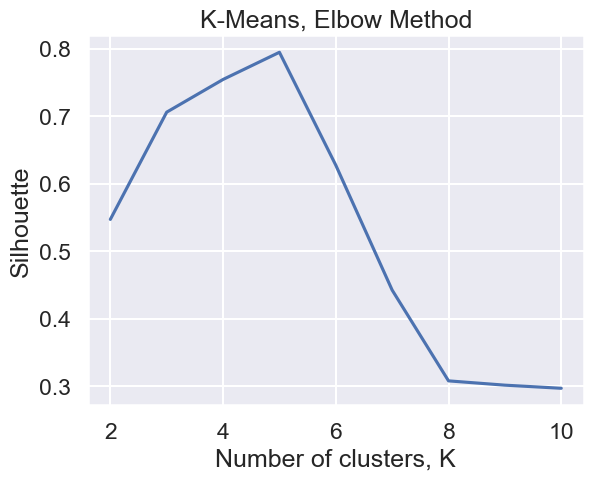

In [504]:
from sklearn.preprocessing import RobustScaler

df1 = X

scaler = RobustScaler()
features = ['Age', 'Income','SpendingScore','Savings']
df1[features] = scaler.fit_transform(df1[features])

ch = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    ch[k] = calinski_harabasz_score(df1, kmeans.labels_)
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("CH");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [505]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df1)

silhouette_score2 = silhouettes[5]
ch_score2 = ch[5]

print("Silhouette Score:", silhouette_score2)
print("Calinski Harabasz Score:", ch_score2)

Silhouette Score: 0.794591651984456
Calinski Harabasz Score: 3585.6293846547887


# 3) MinMax Scaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


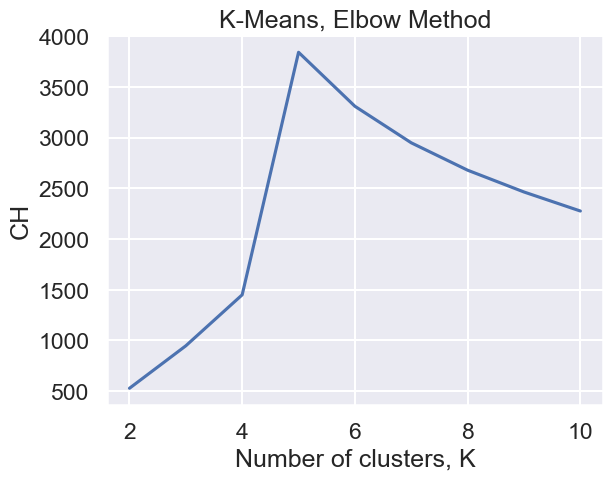

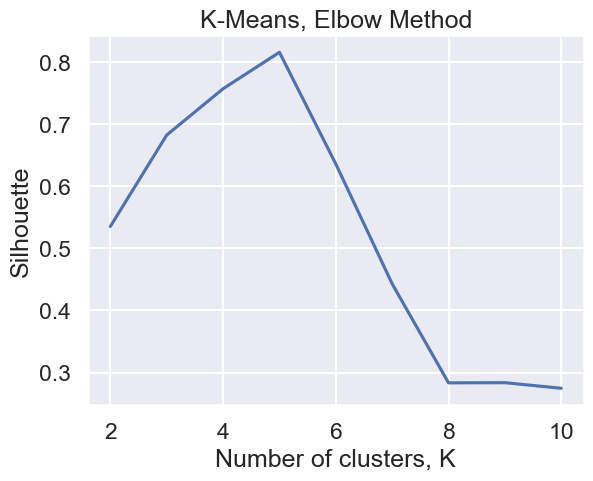

In [506]:
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df1)
features = ['Age', 'Income','SpendingScore','Savings']
df1[features] = scaler.fit_transform(df1[features])

ch = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    ch[k] = calinski_harabasz_score(df1, kmeans.labels_)
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("CH");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


In [507]:
# Apply K-means Clustering. The optimal K according to the plots above is K=5
silhouette_score3 = silhouettes[5]
ch_score3 = ch[5]

print("Silhouette Score:", silhouette_score3)
print("Calinski Harabasz Score:", ch_score3)

Silhouette Score: 0.8156911152768873
Calinski Harabasz Score: 3840.1054314474277


# Proceed with the MinMax scaler preprocessed results, since it yielded the highest internal validation metrics

# Graph Clusters

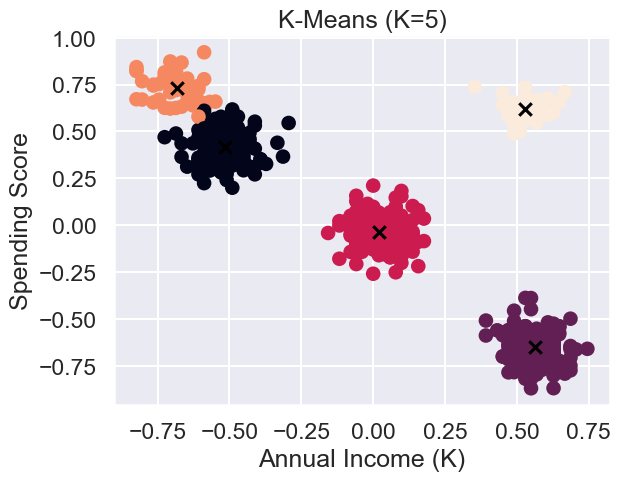

K=5, WCSS=18.20, Sil=0.79


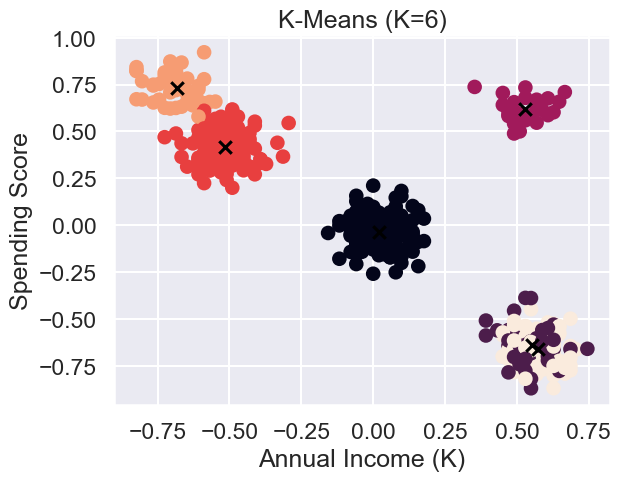

K=6, WCSS=16.66, Sil=0.63


In [508]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(5, 6):
    do_kmeans(X, k)

# Interpret Cluster through Reverse Transfomration

In [558]:
X = scaler.inverse_transform(X_scaled)
X_original = pd.DataFrame(X, columns=df1.columns)
KM_labels = kmeans.fit_predict(X_scaled)
X_original['Cluster'] = KM_labels


# Summarize clusters
cluster_summary = X_original_df_KM.groupby('Cluster').agg(
    {
        'Age': ['mean', 'median', 'std'],
        'Savings': ['mean', 'median', 'std'],
        'Income': ['mean', 'median', 'std'],
        'SpendingScore': ['mean', 'median', 'std']
    }
)

# Print the summary statistics
print("Cluster Summary Statistics:")
print(cluster_summary)


Cluster Summary Statistics:
          Age              Savings                     Income            \
         mean median  std     mean   median     std      mean    median   
Cluster                                                                   
0       32.78  33.00 3.79 14962.78 14976.94 1061.73 105265.81 106002.50   
1       87.78  88.00 3.51 16659.26 16711.07 1183.85  27866.10  27771.00   
2       59.96  59.00 3.38  6889.97  6845.06 1052.28  72448.06  72027.00   
3       24.18  24.50 3.66  4087.52  4361.97 1277.75 128029.12 128162.00   
4       86.00  86.00 3.66 14808.68 14773.41 1159.34 119944.04 119429.00   

                SpendingScore              
            std          mean median  std  
Cluster                                    
0       6080.62          0.31   0.31 0.05  
1       6448.81          0.33   0.32 0.05  
2       6240.26          0.77   0.77 0.05  
3       5688.90          0.90   0.89 0.04  
4       4941.05          0.07   0.06 0.04  


## 1.2: Clustering Algorithm #2

# DBSCAN


# 1) Standard Scalar Preprocessing

In [510]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Hyperparameter values to test
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3]
results = []


for scaler_name, scaler in scalers.items():

    X_scaled = scaler.fit_transform(X)

    for eps in eps_values:
        for min_samples in min_samples_values:
            # DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
            labels = dbscan.fit_predict(X_scaled)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                silhouette_avg = silhouette_score(X_scaled, labels)
                ch_score = calinski_harabasz_score(X_scaled, labels)
                results.append({
                    'Scaler': scaler_name,
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'Silhouette Score': silhouette_avg,
                    'Calinski-Harabasz Score': ch_score
                })


results_df = pd.DataFrame(results)

# Display the top configurations
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print("Top DBSCAN Configurations:")
print(results_df.head())

Top DBSCAN Configurations:
           Scaler  eps  min_samples  n_clusters  Silhouette Score  \
3    MinMaxScaler 0.30            3           5              0.82   
1  StandardScaler 0.50            3           5              0.80   
2  StandardScaler 0.70            3           5              0.80   
5    RobustScaler 0.30            3           5              0.79   
6    RobustScaler 0.50            3           5              0.79   

   Calinski-Harabasz Score  
3                  3840.11  
1                  3671.36  
2                  3671.36  
5                  3585.63  
6                  3585.63  


# Looks like the optimal model has EPS of 0.3 and Min Samples of 5 with Min Max Scalar

In [511]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df1)
features = ['Age', 'Income','SpendingScore','Savings']
df1[features] = scaler.fit_transform(df1[features])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [512]:
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(df1)

db.labels_

ch = calinski_harabasz_score(df1, db.labels_)
silhouette = silhouette_score(df1, db.labels_)
print("Calinski Harabasz (CH)", ch)
print("Silhouette", silhouette)

Calinski Harabasz (CH) 3840.1054314474286
Silhouette 0.8156911152768873


# Reverse Cluster Transformation

In [513]:
# Reverse the transformation (back-transform scaled data to original scale)
X = scaler.inverse_transform(X_scaled)
X_original = pd.DataFrame(X, columns=df1.columns)
X_original['Cluster'] = KM_labels


# Summarize clusters
cluster_summary = X_original_df_KM.groupby('Cluster').agg(
    {
        'Age': ['mean', 'median', 'std'],
        'Savings': ['mean', 'median', 'std'],
        'Income': ['mean', 'median', 'std'],
        'SpendingScore': ['mean', 'median', 'std']
    }
)

# Print the summary statistics
print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
          Age              Savings                     Income            \
         mean median  std     mean   median     std      mean    median   
Cluster                                                                   
0       32.78  33.00 3.79 14962.78 14976.94 1061.73 105265.81 106002.50   
1       87.78  88.00 3.51 16659.26 16711.07 1183.85  27866.10  27771.00   
2       59.96  59.00 3.38  6889.97  6845.06 1052.28  72448.06  72027.00   
3       24.18  24.50 3.66  4087.52  4361.97 1277.75 128029.12 128162.00   
4       86.00  86.00 3.66 14808.68 14773.41 1159.34 119944.04 119429.00   

                SpendingScore              
            std          mean median  std  
Cluster                                    
0       6080.62          0.31   0.31 0.05  
1       6448.81          0.33   0.32 0.05  
2       6240.26          0.77   0.77 0.05  
3       5688.90          0.90   0.89 0.04  
4       4941.05          0.07   0.06 0.04  


# Plotting the Clusters

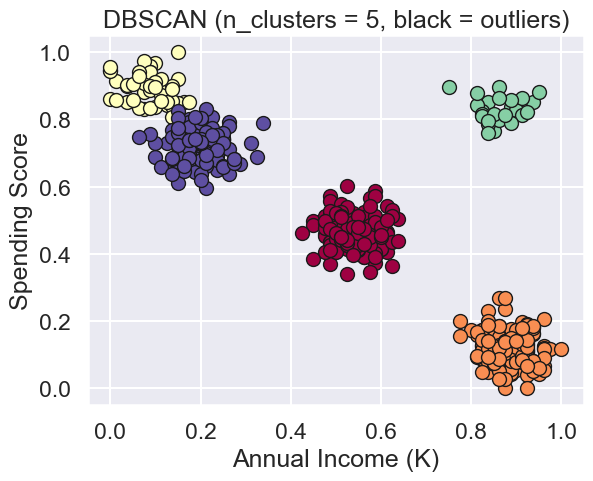

In [514]:
# Plotting the Clusters
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = df1[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');


## 1.3 Model Comparison

Comparison between K-Means and DBSCAN Models:\

Similarities between Algorithms:

Results:
| Metric            | K-Means  | DBSCAN |
| :---------------- | :------: | ----:  |
| Silhouette Score  |   0.8157   | 0.8157  |
| CH Score          |   3840.11   | 3840.11 |
| Optimal Number of Clusters    |  5   | 5  |

Differences between Algorithms:
* K-Means is easier to understand and implement, tuning of model is simpler (only one hyperparameter)
* K-Means is more efficient and scalability (lower time complexity)
* DBSCAN supports outliers and can detect arbitrary (non-circular) cluster shapes

Conclusion:
* K-Means is better for this problem since clusters are spherical and well-separated as seen by the visualizations above. In additin, noise and outliers are at a minimal so implementation of DBSCAN might lead to over segmentation in clean datasets. 

## 1.4 Personas

# Plot Clusters

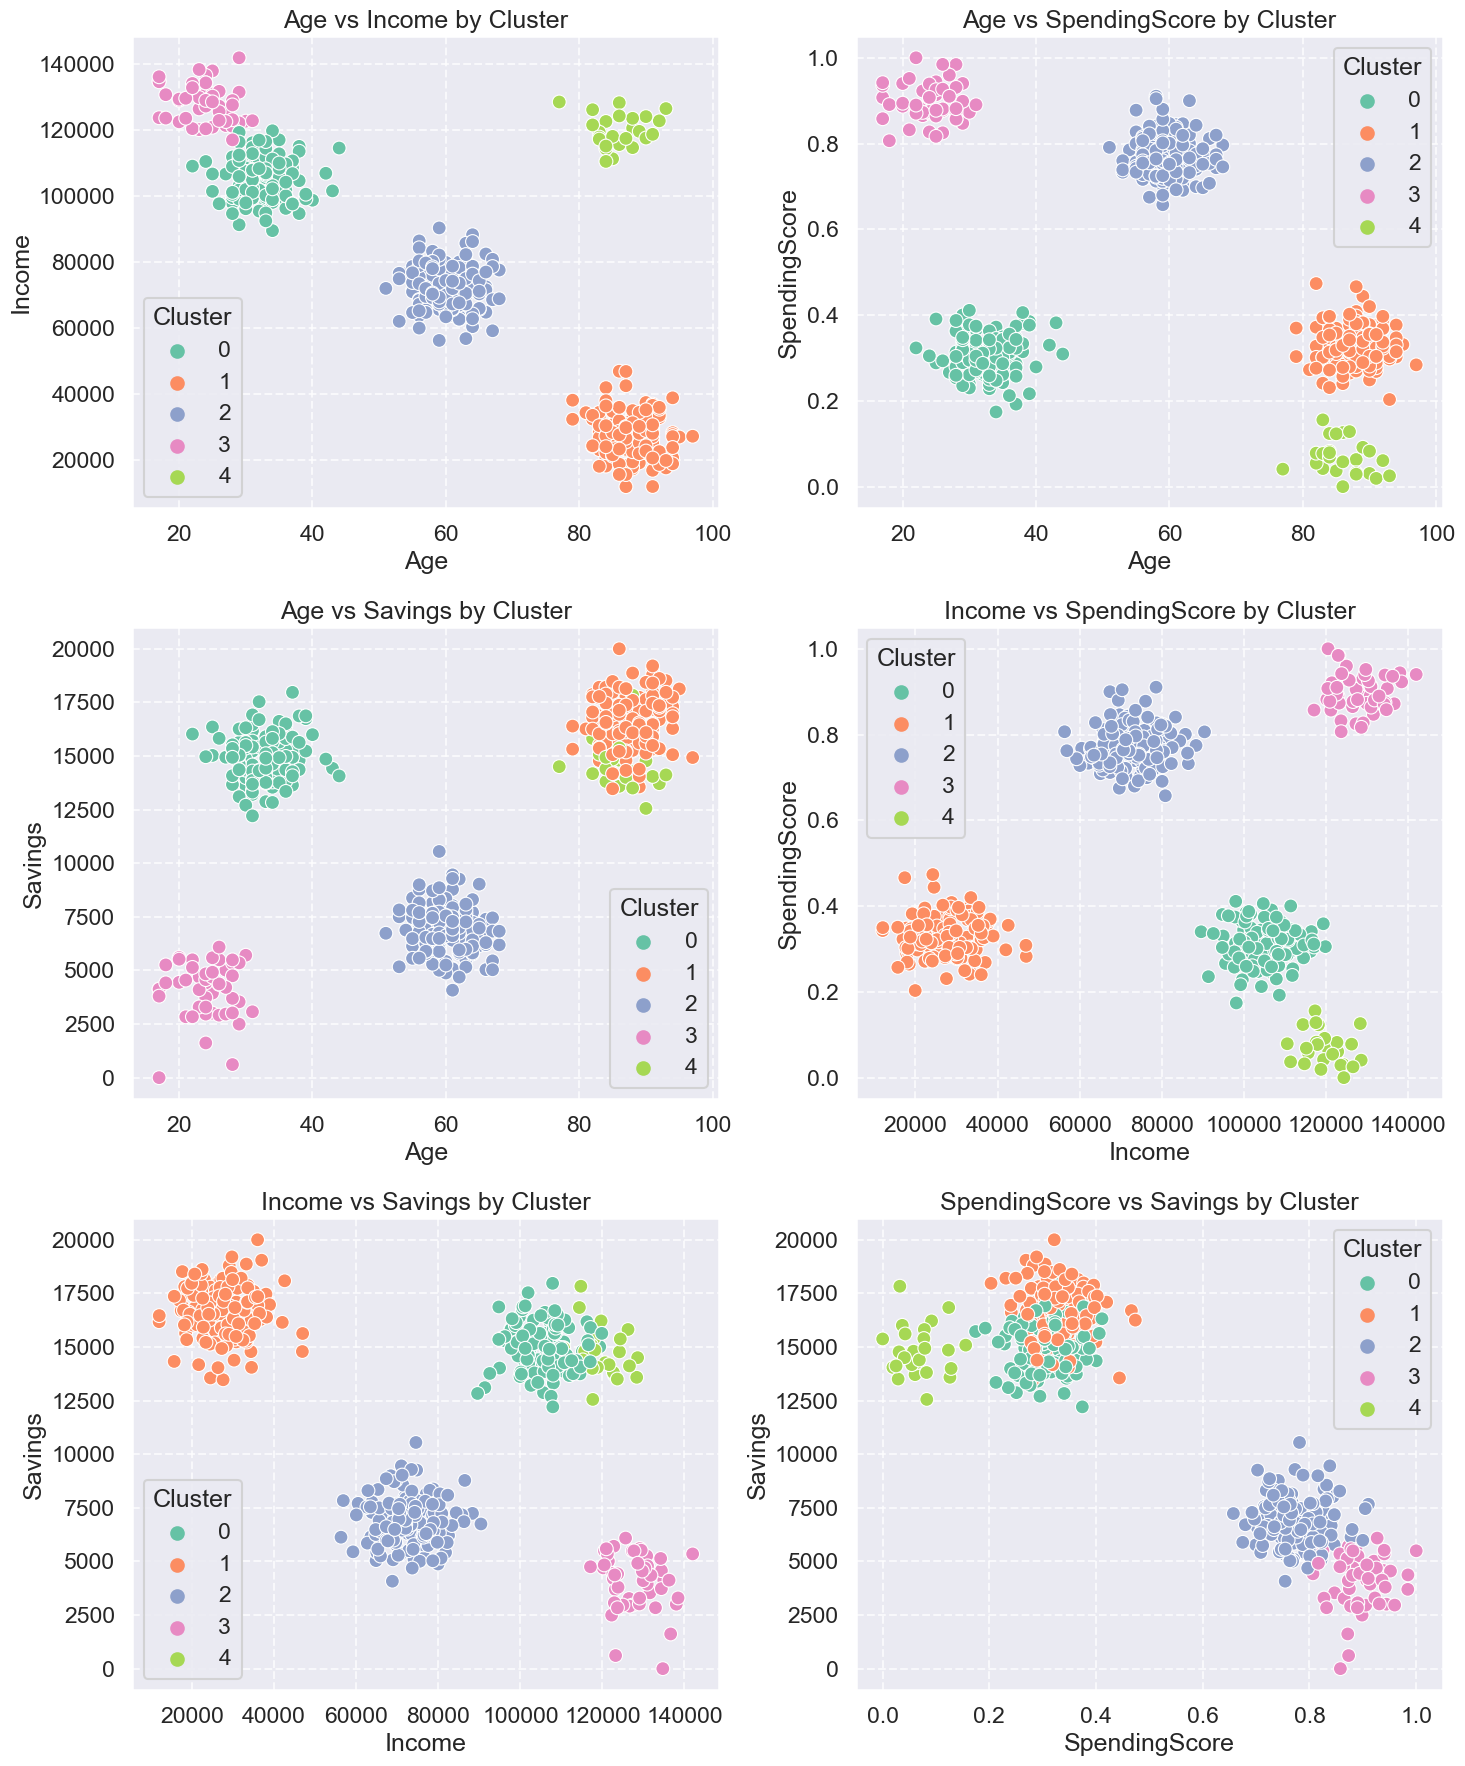

          Age              Savings                     Income            \
         mean median  std     mean   median     std      mean    median   
Cluster                                                                   
0       32.78  33.00 3.79 14962.78 14976.94 1061.73 105265.81 106002.50   
1       87.78  88.00 3.51 16659.26 16711.07 1183.85  27866.10  27771.00   
2       59.96  59.00 3.38  6889.97  6845.06 1052.28  72448.06  72027.00   
3       24.18  24.50 3.66  4087.52  4361.97 1277.75 128029.12 128162.00   
4       86.00  86.00 3.66 14808.68 14773.41 1159.34 119944.04 119429.00   

                SpendingScore              
            std          mean median  std  
Cluster                                    
0       6080.62          0.31   0.31 0.05  
1       6448.81          0.33   0.32 0.05  
2       6240.26          0.77   0.77 0.05  
3       5688.90          0.90   0.89 0.04  
4       4941.05          0.07   0.06 0.04  


In [554]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

features = ['Age', 'Income', 'SpendingScore', 'Savings']

combinations = list(itertools.combinations(features, 2))

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, combo in enumerate(combinations):
    sns.scatterplot(
        data=X_original_df_KM,
        x=combo[0],
        y=combo[1],
        hue="Cluster",
        palette="Set2",
        s=100,
        ax=axes[i]
    )
    axes[i].set_title(f"{combo[0]} vs {combo[1]} by Cluster")
    axes[i].set_xlabel(combo[0])
    axes[i].set_ylabel(combo[1])
    axes[i].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

print(cluster_summary)

# Personas Description

# Cluster 0: High-Achieving Young Working Professionals that Spend Responsibly


Persona: High Achieving, Good Saving Habits, and do not spend excessively at the store
* Average Age is 33
* High Achieving: indicated by high income
* Young Working Professional: indicated by average age of 32.78 while making income of approximately 105k
* Good Saving Habits (indicated by average savings of approximately 15k), and low spending score (0.31) meaning they do not spend excessively at the store

# Cluster 1: Senior Citizens on Pension that save a lot but spend little

* Average age is 88
* Low Income indicated from 28k in income mean (most likely from pensions)
* Save more than half of income (approximately 17k in savings)
* This implies they only spend around 11k (matches up with low spending score)

# Cluster 2: Late Career Working Professionals with Poor Spending Habits

* Average age is 60 years old
* 72k in income puts them in a relatively low-income zone when you compare to other clusters that are younger but make more money
* Spend a lot of jewellery and doesn't appear to have many savings
* Spending score is high, they are generating a lot of sales

# Cluster 3: New Grads with High Paying Jobs, but spend Irresponsibly
* Average Age is 24
* Make the most money, but save the least out of all clusters
* Consumer habits indicate that they are likely to spend recklessly on jewellery, seems like this cluster generates the most sales


# Cluster 4: Senior Citizens with Passive Income, but with Low Expenses/High Savings

* Average Age is 86
* Similar age to Cluster 1, however have much higher income
* Despite having high income, they save a lot and dont have many jewellery expenses
* Very low spending score (0.07), they are not generating many sales

In [557]:
# Summary (Personas)

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

{Bread} -> {Milk}\
"If bread is purchased, then milk is also purchased": High support and confidence due to their complementary nature.


Reasoning: Bread and milk are staples often bought together, especially for households replenishing basic items.
Support: High because bread and milk are in many transactions.
Confidence: High because people buying bread frequently add milk to their basket.

Actionable Insights:\
Promotions: Offer combo deals like "Buy bread, get butter 10% off" to reinforce this pattern.\
Store Layout: Place bread and milk near each other to increase convenience and encourage bundling.


## 2.2: A rule that might have reasonably high support but low confidence.

{Milk} -> {Cookies}

Support: High (e.g., 20%). Milk is a staple with high purchase frequency, and cookies are popular, but not always bought with milk.

Confidence: Low (e.g., 30%). While cookies pair well with milk, most customers buying milk might not buy cookies at the same time. Milk is purchased for diverse reasons (e.g., cereal, tea, cooking).

Actionable Insights:
These rules might highlight opportunities for cross-promotion.

For example:\
Offer "Buy milk, get cookies 10% off" to boost confidence.


## 2.3: A rule that might have low support and low confidence.

{Hair Goo} -> {Maple Syrup}

Reasoning:\
A grocery store rule with low support and low confidence would involve items that are not commonly purchased together or have niche associations.

Support: Low (e.g., 1-2%). Hair goo and maple syrup appeal to different customer segments and are rarely purchased together.

Confidence: Low (e.g., 5%). Even when hair goo is purchased, it’s unlikely to be accompanied by maple syrup, as they don't commonly go together.

Actionable Insights:\
Identify niche behavior (e.g., a small group buying hair goo and maple syrup for unique recipes). To be disregarded due to their low relevance.


## 2.4: A rule that might have low support and high confidence.

{Waffles} -> {Maple Syrup}\

Reasoning:\
Waffles are not purchased as frequently as staples like bread or milk. When customers buy waffles, they very often buy maple syrup, as it’s a common pairing.

Low Support: Waffles are a less frequent purchase, possibly considered an indulgence or specialty item.
High Confidence: Most waffle buyers are likely to buy maple syrup because it’s the standard topping.

Actionable Insights:\
Opportunities for Cross-Promotion: Use rules like this for targeted marketing. For example, "Buy waffles, get 20% off maple syrup.\
Inventory Planning: Ensure related low-support items like waffles and maple syrup are stocked alongside their counterparts to encourage sales.


# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

# Data Cleaning

In [516]:
# DO NOT MODIFY THIS CELL
import datetime as dt

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

display(df3.head(5))

# Train Data Set
df3 = df3.replace({'Sex' : {'M' : 1, 'F' : 0}})

# Use One-Hot Encoding for City and Purpose
one_hot = pd.get_dummies(df3['City'],dtype=int)
df3 = df3.drop('City',axis = 1)
df3 = df3.join(one_hot)

one_hot2 = pd.get_dummies(df3['Purpose'],dtype=int)
df3 = df3.drop('Purpose',axis = 1)
df3 = df3.join(one_hot2)

# Drop String Variables
df3_baseline = df3.drop(['UserID','FirstName','LastName','Street','LicensePlate'],axis = 1)

display(df3_baseline.head(5))

df3_baseline.to_csv('df3baseline.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,BadCredit,Amount,Married,Duration,DateOfBirth,...,Robinsonshire,West Michael,Business,Education,Household,NewCar,Other,Repair,UsedCar,Vacation
0,0,0,2,3,1,0,3907,0,24,1964-04-07,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,3235,0,12,1978-06-02,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,2,0,3108,1,30,1972-03-18,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,3,1,4014,1,36,1985-02-26,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,5,1,1,3823,0,18,1983-08-08,...,0,0,0,0,0,0,0,0,0,1


# Split the Data in Training and Testing

In [517]:
from sklearn.model_selection import train_test_split

X = df3_baseline.drop(['BadCredit','DateOfBirth'], axis=1) #.select_dtypes(['number'])
y = df3_baseline['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1: Baseline model: Decision Tree

In [518]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)
print(y_pred_dt)

classification = classification_report(y_test, y_pred_dt);
confusion = confusion_matrix(y_test, y_pred_dt);
f1score = f1_score(y_test, y_pred_dt);

print(classification)
print("Confusion Matrix:", confusion)
print("F1-Score:", f1score)

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       991
           1       0.00      0.00      0.00       209

    accuracy                           0.83      1200
   macro avg       0.41      0.50      0.45      1200
weighted avg       0.68      0.83      0.75      1200

Confusion Matrix: [[991   0]
 [209   0]]
F1-Score: 0.0


# Cross Validation of Baseline Model

In [519]:
# Pre Cross Validation (with Baseline Model)
# TODO: Insert code here. Feel free to create additional code cells if necessary.
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1_macro")
print("Mean F1-Score: {:.4f}".format(np.mean(scores)))
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Mean F1-Score: 0.6193
F1-Score: 0.62 (+/- 0.03)


# Commentary of Baseline Model
A decision tree was chosen as the baseline model (no feature engineering, no feature selection, no hyperparameter tuning with just the default settings). Using K-fold cross validation with 10 folds, we are able to measure the performance of the baseline model on unseen data. From the above, we see that the mean F1-Score is determined to be 0.6193.


Date of Birth had to be reincluded in Train and Test sets in order to create new Age variable in feature engineering 

In [520]:
from sklearn.model_selection import train_test_split

X = df3_baseline.drop(['BadCredit'], axis=1) #.select_dtypes(['number'])
y = df3_baseline['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2: Adding feature engineering

The three features that I engineered are the following:
1) Age (defined as today - DateofBirth)
2) Pet (1: if Number of Pets > 1, 0: otherwise)
3) New Customer (1: if Previous Accounts > 1, 0: otherwise)

In [559]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
# Age was already feature engineered in the previous section. Add Group by Metrics
X_train['today']=dt.date.today()
X_train['Age'] = round(((pd.to_datetime(X_train['today'])-pd.to_datetime(X_train['DateOfBirth'])).dt.days)/365,0)
X_train = X_train.drop(columns=['DateOfBirth'])
X_train = X_train.drop(columns=['today'])
X = X.drop(columns=['DateOfBirth'])


# TODO: Insert code here. Feel free to create additional code cells if necessary.
# Age was already feature engineered in the previous section. Add Group by Metrics
X_test['today']=dt.date.today()
X_test['Age'] = round(((pd.to_datetime(X_test['today'])-pd.to_datetime(X_test['DateOfBirth'])).dt.days)/365,0)
X_test = X_test.drop(columns=['DateOfBirth'])
X_test = X_test.drop(columns=['today'])

# Has Pet?
X_train['Pet'] = X_train['NumberPets'].apply(lambda x: 1 if x > 0 else 0)
X_test['Pet'] = X_test['NumberPets'].apply(lambda x: 1 if x > 0 else 0)

# New Customer?
X_train['newcustomer'] = X_train['PreviousAccounts'].apply(lambda x: 1 if x > 0 else 0)
X_test['newcustomer'] = X_test['PreviousAccounts'].apply(lambda x: 1 if x == 0 else 0)

display(X_train.head(5))

KeyError: 'DateOfBirth'

# Standardization

In [522]:
# Check Skew
from scipy import stats
from scipy.stats import skew, norm

train_numeric = X_train[['Amount','Duration','Age']]
skew = train_numeric.skew(axis=0)
print(skew)


Amount     -0.08
Duration   -0.46
Age        -0.20
dtype: float64


In [523]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Amount','Duration','Age']])


X_train[['Amount','Duration','Age']] = scaler.transform(X_train[['Amount','Duration','Age']])   
X_test[['Amount','Duration','Age']] = scaler.transform(X_test[['Amount','Duration','Age']])

# Retrain Baseline Model with Feature Engineering/Preprocessing

In [524]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
clf2 = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring="f1_macro")
print("Mean F1-Score: {:.4f}".format(np.mean(scores)))
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

clf2.fit(X_train, y_train)

y_pred_dt2 = clf2.predict(X_test)
print(y_pred_dt2)

classification = classification_report(y_test, y_pred_dt2);
confusion = confusion_matrix(y_test, y_pred_dt2);
f1score = f1_score(y_test, y_pred_dt2);

print(classification)
print("Confusion Matrix:", confusion)
print("F1-Score:", f1score)

Mean F1-Score: 0.7269
F1-Score: 0.73 (+/- 0.03)
[0 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       991
           1       0.54      0.55      0.54       209

    accuracy                           0.84      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.84      0.84      0.84      1200

Confusion Matrix: [[895  96]
 [ 95 114]]
F1-Score: 0.5441527446300716


# Commentary of Retrained Model after Feature Engineering/Preprocessing
A decision tree that incorporates the three new engineered features enhances the mean F1-Score (cv = 10) from 0.6193 to 0.7208. Therefore, the new features appear to hold predictive power and benefits the model.

# Dealing with Class Imbalance

In [525]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Helper function
def quick_evaluate_with_dt(X_train, X_test, y_train, y_test, name, balance_weights=False):
    
    cw = None
    if balance_weights == True:
        cw = 'balanced'
        
    clf = DecisionTreeClassifier(random_state=0, class_weight=cw)
    clf = RandomForestClassifier(random_state=0, n_estimators=100, class_weight=cw)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy       = accuracy_score(y_test, y_pred)
    f1             = f1_score(y_test, y_pred)
    recall         = recall_score(y_test, y_pred)
    precision      = precision_score(y_test, y_pred)
    roc_auc        = roc_auc_score(y_test, y_pred)
    
    df = pd.DataFrame({"Method"    : [name],
                       "Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy],
                       "Recall"    : [recall],
                       "Precision" : [precision],
                       "F1"        : [f1],
                       "AUC"       : [roc_auc],
                      })
    
    print(df)
    return df

evals = list()

In [526]:
X_train.shape
y_train.shape
np.bincount(y_train)

# There is class imbalance with 147: Positives and 1053 for Negatives
evals.append(quick_evaluate_with_dt(X_train, X_test, y_train, y_test, 'None'))

  Method   Neg  True Neg  False Neg  Pos   TP  FP  Accuracy  Recall  \
0   None  1060       958        102  140  107  33      0.89    0.51   

   Precision   F1  AUC  
0       0.76 0.61 0.74  


In [527]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled.shape
y_resampled.shape
np.bincount(y_resampled)

evals.append(quick_evaluate_with_dt(X_resampled, X_test, y_resampled, y_test, 'Over Random'))

        Method   Neg  True Neg  False Neg  Pos   TP  FP  Accuracy  Recall  \
0  Over Random  1011       932         79  189  130  59      0.89    0.62   

   Precision   F1  AUC  
0       0.69 0.65 0.78  


In [528]:
from imblearn.over_sampling import SMOTE
# Smote Seems to be the Best

X_resampled2, y_resampled2 = SMOTE(random_state=0).fit_resample(X_train, y_train)

X_resampled2.shape
y_resampled2.shape
np.bincount(y_resampled2)

evals.append(quick_evaluate_with_dt(X_resampled2, X_test, y_resampled2, y_test, 'Over SMOTE'))

       Method  Neg  True Neg  False Neg  Pos   TP  FP  Accuracy  Recall  \
0  Over SMOTE  973       909         64  227  145  82      0.88    0.69   

   Precision   F1  AUC  
0       0.64 0.67 0.81  


In [529]:
from imblearn.over_sampling import ADASYN

X_resampled3, y_resampled3 = ADASYN(random_state=0).fit_resample(X_train, y_train)

X_resampled3.shape
y_resampled3.shape
np.bincount(y_resampled3)

evals.append(quick_evaluate_with_dt(X_resampled3, X_test, y_resampled3, y_test,  'Over ADASYN'))

        Method  Neg  True Neg  False Neg  Pos   TP  FP  Accuracy  Recall  \
0  Over ADASYN  955       895         60  245  149  96      0.87    0.71   

   Precision   F1  AUC  
0       0.61 0.66 0.81  


In [530]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled4, y_resampled4 = rus.fit_resample(X_train, y_train)

X_resampled4.shape
y_resampled4.shape
np.bincount(y_resampled)

evals.append(quick_evaluate_with_dt(X_resampled, X_test, y_resampled, y_test,  'Under Sample'))

         Method   Neg  True Neg  False Neg  Pos   TP  FP  Accuracy  Recall  \
0  Under Sample  1011       932         79  189  130  59      0.89    0.62   

   Precision   F1  AUC  
0       0.69 0.65 0.78  


In [531]:
# Recall the actual distribution of the truth labels of the testing set.
y_test.value_counts()

evals_all = pd.concat([m for m in evals], axis = 0).reset_index()

evals_all = evals_all.drop(columns = "index",axis =1)
evals_all.sort_values(by=['F1'], ascending=False)

,Method,Neg,True Neg,False Neg,Pos,TP,FP,Accuracy,Recall,Precision,F1,AUC
2,Over SMOTE,973,909,64,227,145,82,0.88,0.69,0.64,0.67,0.81
3,Over ADASYN,955,895,60,245,149,96,0.87,0.71,0.61,0.66,0.81
1,Over Random,1011,932,79,189,130,59,0.89,0.62,0.69,0.65,0.78
4,Under Sample,1011,932,79,189,130,59,0.89,0.62,0.69,0.65,0.78
0,None,1060,958,102,140,107,33,0.89,0.51,0.76,0.61,0.74


## 3.3: Adding feature selection

# Univariate Feature Selection (Filter Method, Supervised)


In [532]:
from sklearn.feature_selection import RFE

clf2 = DecisionTreeClassifier(random_state=0)
sel = RFE(estimator=clf2, n_features_to_select=10)
sel = sel.fit(X_resampled2, y_resampled2)

X_train_new = sel.transform(X_resampled2)
X_test_new = sel.transform(X_test)

X_train_new.shape

clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train_new, y_resampled2)
y_pred = clf2.predict(X_test_new)
print(classification_report(y_test, y_pred))

sel.ranking_


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       991
           1       0.55      0.57      0.56       209

    accuracy                           0.84      1200
   macro avg       0.73      0.74      0.73      1200
weighted avg       0.85      0.84      0.84      1200



array([ 1, 24,  1,  1,  1,  1,  1,  1, 22, 14, 10,  8, 30, 27, 18,  9, 12,
       19, 25, 26,  3,  1, 16, 29, 17, 28, 20, 23, 21, 13,  7,  1,  5, 11,
        4,  2,  1,  6, 15])

# Retraining the Model after Feature Selection

In [533]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
clf3 = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf3, X_resampled2, y_resampled2, cv=10, scoring="f1_macro")
print("Mean F1-Score: {:.4f}".format(np.mean(scores)))
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

clf3.fit(X_train, y_train)

y_pred_dt = clf3.predict(X_test)
print(y_pred_dt)

classification = classification_report(y_test, y_pred_dt);
confusion = confusion_matrix(y_test, y_pred_dt);
f1score = f1_score(y_test, y_pred_dt);

print(classification)
print("Confusion Matrix:", confusion)
print("F1-Score:", f1score)


Mean F1-Score: 0.8803
F1-Score: 0.88 (+/- 0.07)
[0 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       991
           1       0.54      0.55      0.54       209

    accuracy                           0.84      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.84      0.84      0.84      1200

Confusion Matrix: [[895  96]
 [ 95 114]]
F1-Score: 0.5441527446300716


# Commentary of Retrained Model after Feature Selection
After feature selection, the decision tree enhances the mean F1-Score (cv = 10) from 0.7208 to 0.8801. Features selection appears to be incredibly important as it enhances the mean F1-Score by a substantial amount. 

## 3.4: Adding hyperparameter tuning

In [534]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_split': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search = search.fit(X_resampled2, y_resampled2)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


In [535]:
print(search.best_params_)
print(search.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 1.0, 'min_samples_split': 10, 'splitter': 'best'}
0.891047122709727


# Retraining the Model after Hyperparameter Tuning

In [536]:
clf4 = DecisionTreeClassifier(criterion='gini', max_depth=10
                             ,min_samples_split=5, random_state=0, max_features = 1.0, splitter = 'best')
scores = cross_val_score(clf4, X_resampled2, y_resampled2, cv=10, scoring="f1_macro")
print("Mean F1-Score: {:.4f}".format(np.mean(scores)))
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

clf4.fit(X_train, y_train)

y_pred_dt = clf4.predict(X_test)
print(y_pred_dt)

classification = classification_report(y_test, y_pred_dt);
confusion = confusion_matrix(y_test, y_pred_dt);
f1score = f1_score(y_test, y_pred_dt);

print(classification)
print("Confusion Matrix:", confusion)
print("F1 Score:", f1score)


Mean F1-Score: 0.8902
F1-Score: 0.89 (+/- 0.05)
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       991
           1       0.61      0.52      0.56       209

    accuracy                           0.86      1200
   macro avg       0.76      0.72      0.74      1200
weighted avg       0.85      0.86      0.85      1200

Confusion Matrix: [[923  68]
 [101 108]]
F1 Score: 0.561038961038961


# Commentary of Retrained Model after Hyperparameter Tuning
After hyperparameter tuning, the decision tree enhances the mean F1-Score (cv = 10) slightly from 0.8801 to 0.8908. By optimizing the parameters, we are able to increase the accuracy and F1-Score leading to increased overall performance.

## 3.5: Performance estimation on testing data

In [537]:
# Data Cleaning on Test and Train Set
clf5 = DecisionTreeClassifier(criterion='gini', max_depth=10
                             ,min_samples_split=5, random_state=0, max_features = 1.0, splitter = 'best')

clf5.fit(X_train, y_train)

y_pred_dt = clf5.predict(X_test)
print(y_pred_dt)

classification = classification_report(y_test, y_pred_dt);
confusion = confusion_matrix(y_test, y_pred_dt);
accuracy = accuracy_score(y_test, y_pred_dt);
f1score = f1_score(y_test, y_pred_dt);

print(classification)
print("Confusion Matrix:", confusion)
print("Accuracy:", accuracy)
print("F1-Score:", f1score)


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       991
           1       0.61      0.52      0.56       209

    accuracy                           0.86      1200
   macro avg       0.76      0.72      0.74      1200
weighted avg       0.85      0.86      0.85      1200

Confusion Matrix: [[923  68]
 [101 108]]
Accuracy: 0.8591666666666666
F1-Score: 0.561038961038961


# Final Model Remarks
The model performed reasonably well with 923 TP's, 108 TN's, 101 FP's and 68 FN's in the confusion matrix. It is to be noted that the accuracy is higher than the F1-Score due to the class imbalance in the original dataset. Although this is partially rectified by the over-SMOTE class imbalance technique, it is still apparent that the model is worse at predicting the minority class (Bad Credit) vs. majority class (Majority Class). Through the entire data pipeline, we have done feature engineering/preprocessing, features selection, dealt with class imbalance, and hyperparameter tuning. It is apparent that the performance improves with every step.

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.




Cost of Random Forest:\
Inspection Cost: 500*(201+50) = 125,500
Service Cost: (before turbine fails): 2000 x 201 = 402,000\
Service Cost: (after turbine fails): 20000 x 55 = 1,100,000\
Total Cost = 125,550 + 402,000 + 1,100,000 = 1,627,500

Cost of RNN:\
Inspection Cost: 500 x (226+1200) = 713,000\
Service Cost (before turbine fails): 2000 x 226 = 452,000\
Service Cost (after turbine fails): 20000 x 30 = 600,000\
Total Cost = 713,000 + 452,000 + 600,000 = 1,765,000

Random Forest (will save): 1,765,000 - 1627,500 = $137,500

By using the random forest model instead of RNN, Uncle Steve is able to save 137,500 dollars which is attributed to the 587,500 dollars saved from inspection costs and 50,000 dollars saved in service costs (before turbine fails). This is partially offset by the additional 500,000 dollars spent in service costs (after turbine fails). Overall, although the random forest model misses more wind turbine failures than RNN, the benefits outweigh the costs. The Type 1 Error (False Positives) are much less. Ultimately, this saves costs on unnecessary inspections when wind turbines are predicted to fail, but do not actually fail. 